In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lorentz_def(x,y0,xc,q,A,noise):
    y = y0/2-(2*A/np.pi)*(xc*q/(4*q**2*(x-xc)**2+xc**2))
    y = y + np.random.normal(y, noise)
    return y

def fano(x,y0,xc,A,u,q,noise):
    y = y0/2+A*((u+(2*q/xc)*(xc-x))**2/(1+((2*q/xc)*(xc-x))**2))
    y = y + np.random.normal(y, noise)
    return y 

Text(0.5, 1.0, 'Lorentz resonances spectrum')

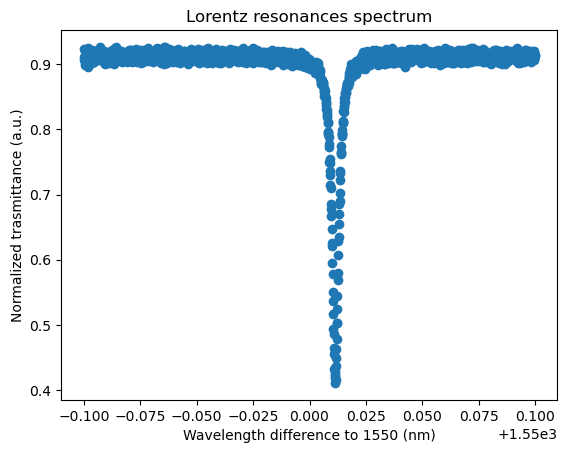

In [22]:
############# TEST INPUT PARAMETERS FOR FANO AND LORENTZ RESONANCES ##############

wl=np.arange(1549.9,1550.1,0.0001)
fano_test = fano(x=wl, y0=np.random.uniform(0.1, 0.3), u=0.3, xc=np.random.uniform(1549.95, 1550.05), q=np.random.uniform(1e5, 1e6), A=np.random.uniform(0.05, 0.3), noise=0.005)
lorentz_test = lorentz_def(x=wl, y0=np.random.uniform(0.9, 0.95), xc=np.random.uniform(1549.95, 1550.05), q=np.random.uniform(1e5, 1e6), A=np.random.uniform(0.001,0.0015), noise=0.005)


#plt.scatter(wl, fano_test)
plt.scatter(wl, lorentz_test)
plt.xlabel('Wavelength difference to 1550 (nm)')
plt.ylabel('Normalized trasmittance (a.u.)')
plt.title('Lorentz resonances spectrum')


In [40]:
############## CREATION OF THE RESONANCE MATRIX #############

wl=np.arange(1549.9,1550.1,0.0001)
data_res = np.zeros((3000,2001))
lorentz_label = 1
fano_label = 0

for i in range(1000):
    lorentz = lorentz_def(x=wl, y0=np.random.uniform(0.8, 0.95), xc=np.random.uniform(1549.95, 1550.05), q=np.random.uniform(1e5, 1e6), A=np.random.uniform(0.001,0.0015), noise=0.005)
    lorentz = np.append(lorentz, lorentz_label)
    data_res[i,:] = lorentz

#Asymmetric Fano resonances (coupling parameter |u|>0.1, positive or negative values gives specular resonances)

for i in range(500):
    fano_asimm_sx = fano(x=wl, y0=np.random.uniform(0.1, 0.3), u=np.random.uniform(0.05, 0.3), xc=np.random.uniform(1549.95, 1550.05), q=np.random.uniform(1e5, 1e6), A=np.random.uniform(0.05, 0.3), noise=0.005)
    fano_asimm_sx = np.append(fano_asimm_sx, fano_label)
    data_res[i+1000,:] = fano_asimm_sx 

for i in range(500):
    fano_asimm_dx = fano(x=wl, y0=np.random.uniform(0.1, 0.3), u=-np.random.uniform(0.05, 0.3), xc=np.random.uniform(1549.95, 1550.05), q=np.random.uniform(1e5, 1e6), A=np.random.uniform(0.05, 0.3), noise=0.005)
    fano_asimm_dx = np.append(fano_asimm_dx, fano_label)
    data_res[i+1500,:] = fano_asimm_dx 

#Symmetric Fano resonances (coupling parameter |u|<<0.1). Similar to Lorentz resonances.

for i in range(1000):
    fano_simm = fano(x=wl, y0=np.random.uniform(0.1, 0.3), u=1e-5, xc=np.random.uniform(1549.95, 1550.05), q=np.random.uniform(1e5, 1e6), A=np.random.uniform(0.05, 0.3), noise=0.005)
    fano_simm = np.append(fano_simm, fano_label)
    data_res[i+2000,:] = fano_simm 

#print(data_test[1000])

In [41]:
import h5py

with h5py.File(r'C:\Users\marce\Uni\Dottorato\Machine learning\ML_exam\resonances_dataset.h5', 'w') as f:
    f.create_dataset('resonances', data=data_res)
